## Import necessary libraries

Python Kernel used for development and testing: Python 3.11.8

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import feature_extraction, naive_bayes, metrics
from sklearn.tree import DecisionTreeClassifier
import math
import seaborn as sns
import sys

%matplotlib inline




### Assuming both trainingset.txt and queries.txt are located in the same folder as this file.

## Import Training Set

In [4]:
dfTraining = pd.read_csv('trainingset.txt')

print(dfTraining)

       age      job   marital  education default  balance housing loan  \
0       44  JobCat9    single  secondary      no       29     yes   no   
1       47  JobCat3   married    unknown      no     1506     yes   no   
2       31  unknown    single    unknown      no        1      no   no   
3       26  JobCat6    single   tertiary      no      447     yes  yes   
4       42  JobCat4  divorced   tertiary     yes        2     yes   no   
...    ...      ...       ...        ...     ...      ...     ...  ...   
27267   73  JobCat2   married  secondary      no     2850      no   no   
27268   23  JobCat9    single  secondary      no      505      no  yes   
27269   72  JobCat2   married  secondary      no     5715      no   no   
27270   57  JobCat3   married  secondary      no      668      no   no   
27271   35  JobCat4   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       

## Import Query set

In [5]:

dfTest = pd.read_csv('queries.txt')

dfTest.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,JobCat6,married,tertiary,no,2143,yes,no,unknown,5,may,0,1,-1,0,unknown,?
1,31,JobCat4,married,secondary,no,2,yes,yes,unknown,5,may,0,1,-1,0,unknown,?
2,33,JobCat6,married,tertiary,no,231,yes,no,unknown,5,may,0,1,-1,0,unknown,?
3,43,JobCat9,single,secondary,no,593,yes,no,unknown,5,may,0,1,-1,0,unknown,?
4,27,JobCat11,single,secondary,no,390,yes,no,unknown,5,may,0,1,-1,0,unknown,?


Get columns name 

In [6]:
columns_name = dfTraining.columns.tolist()
columns_name


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

Get columns types


In [7]:
dfTraining.dtypes   

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Data Visualization

In [8]:
def GeneratePairGrid(df):
    PairGrid = sns.PairGrid(df, diag_sharey=False)
    PairGrid.map_upper(sns.histplot)
    PairGrid.map_lower(sns.histplot)
    PairGrid.map_diag(sns.kdeplot)
    plt.show()

In [9]:
def GenerateCorrMap(df):
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, cmap='crest', annot=True)
    plt.show()

c:\Users\d4nie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


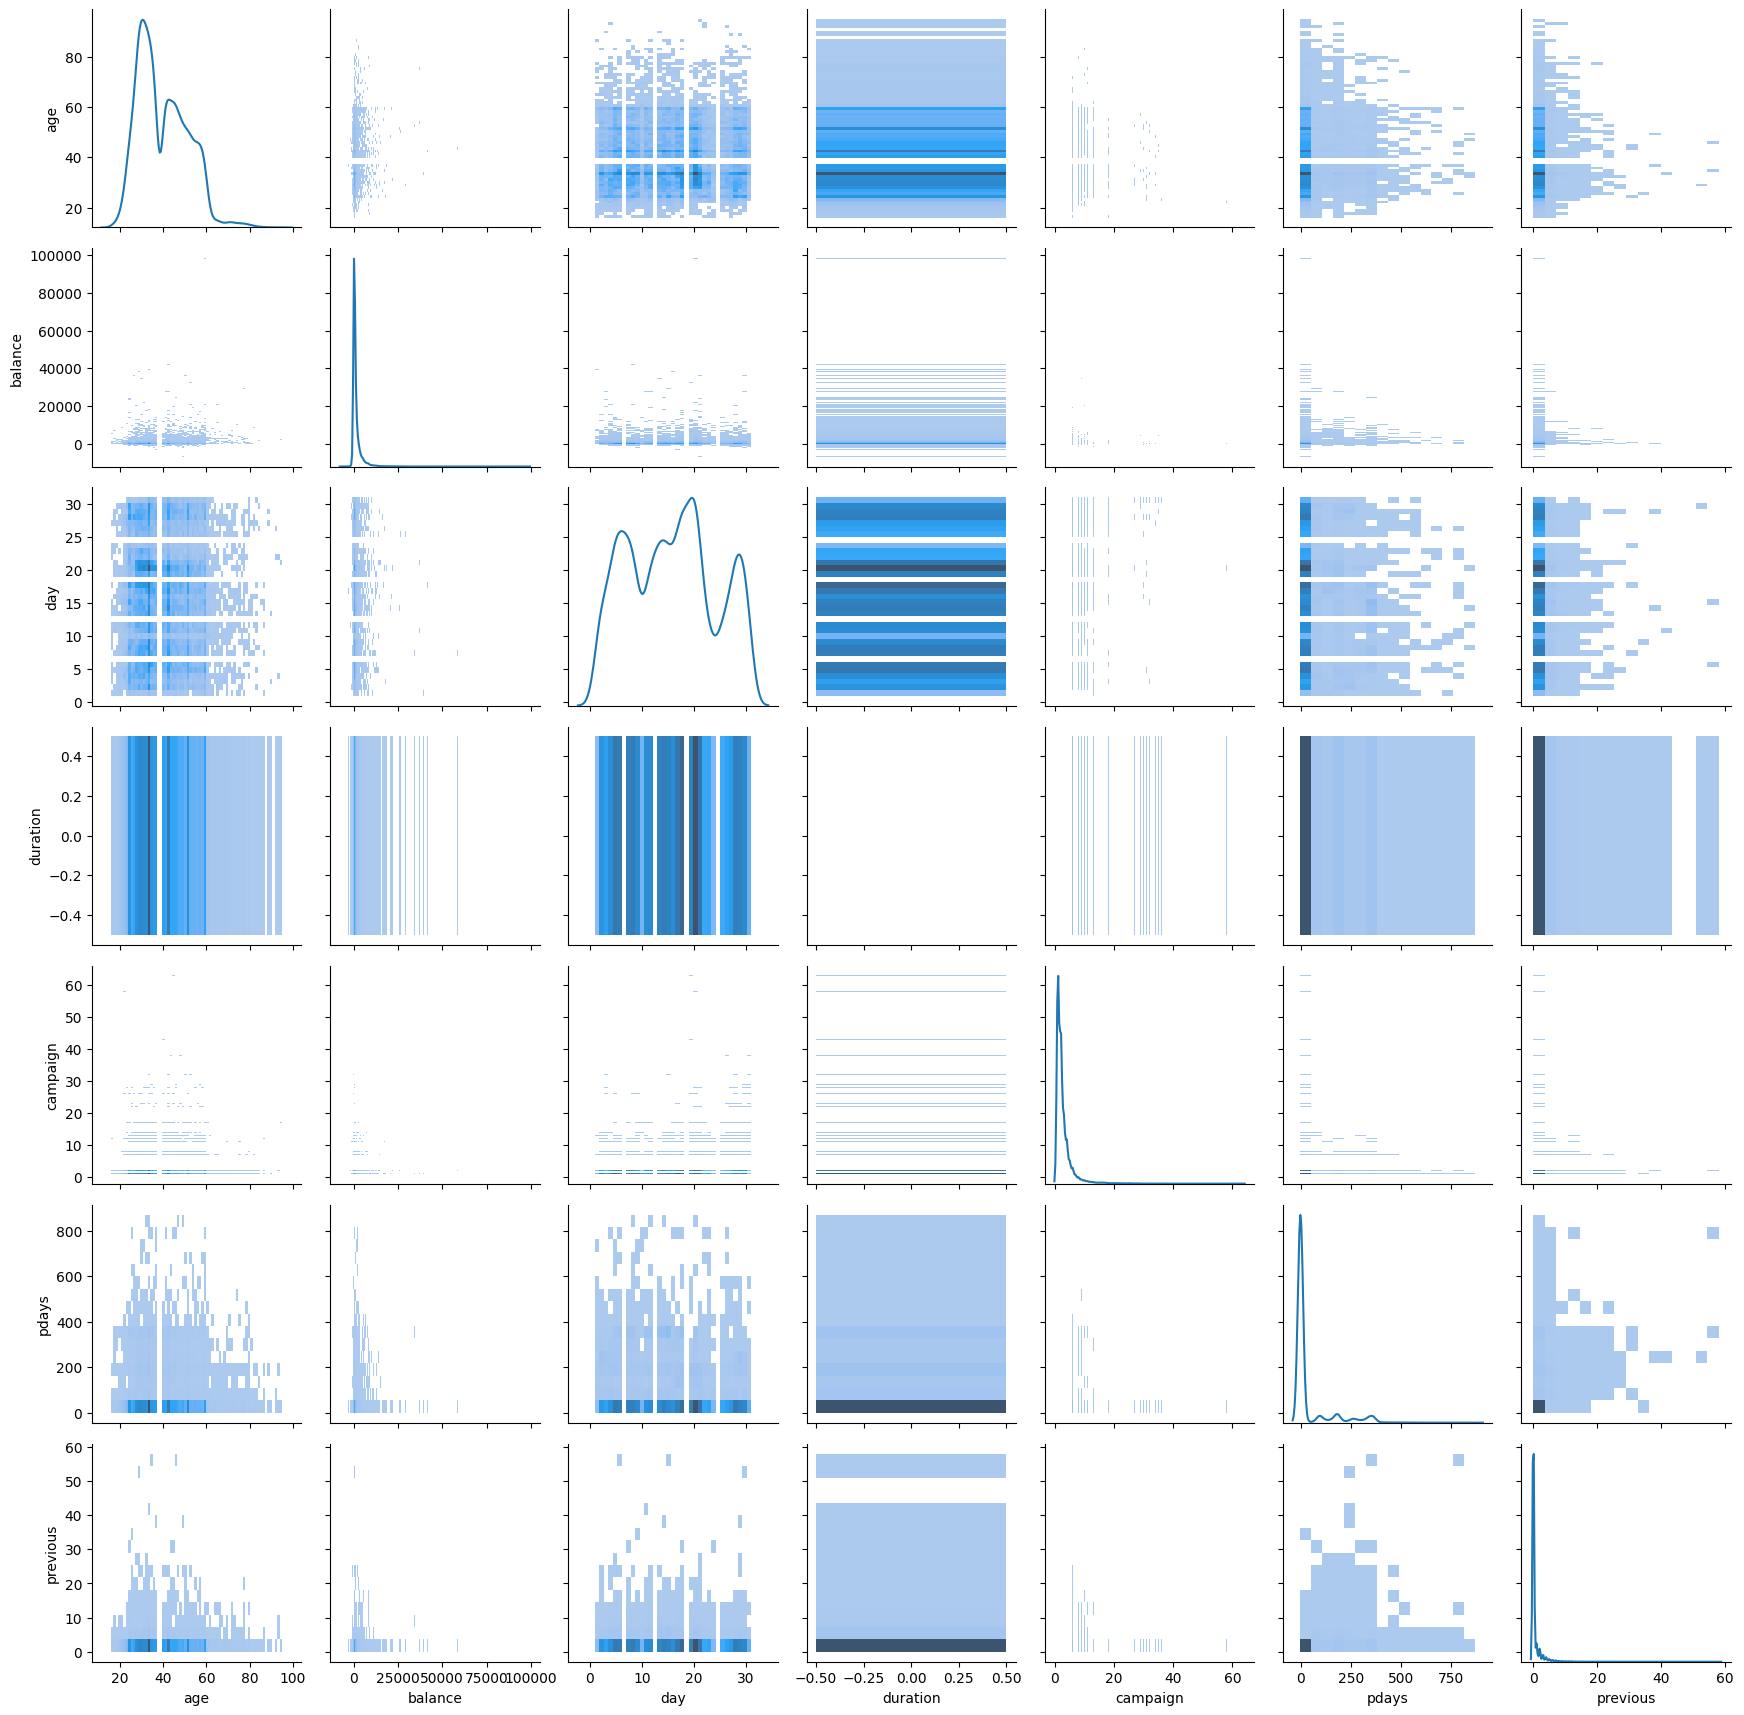

In [10]:
GeneratePairGrid(dfTraining)

c:\Users\d4nie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)


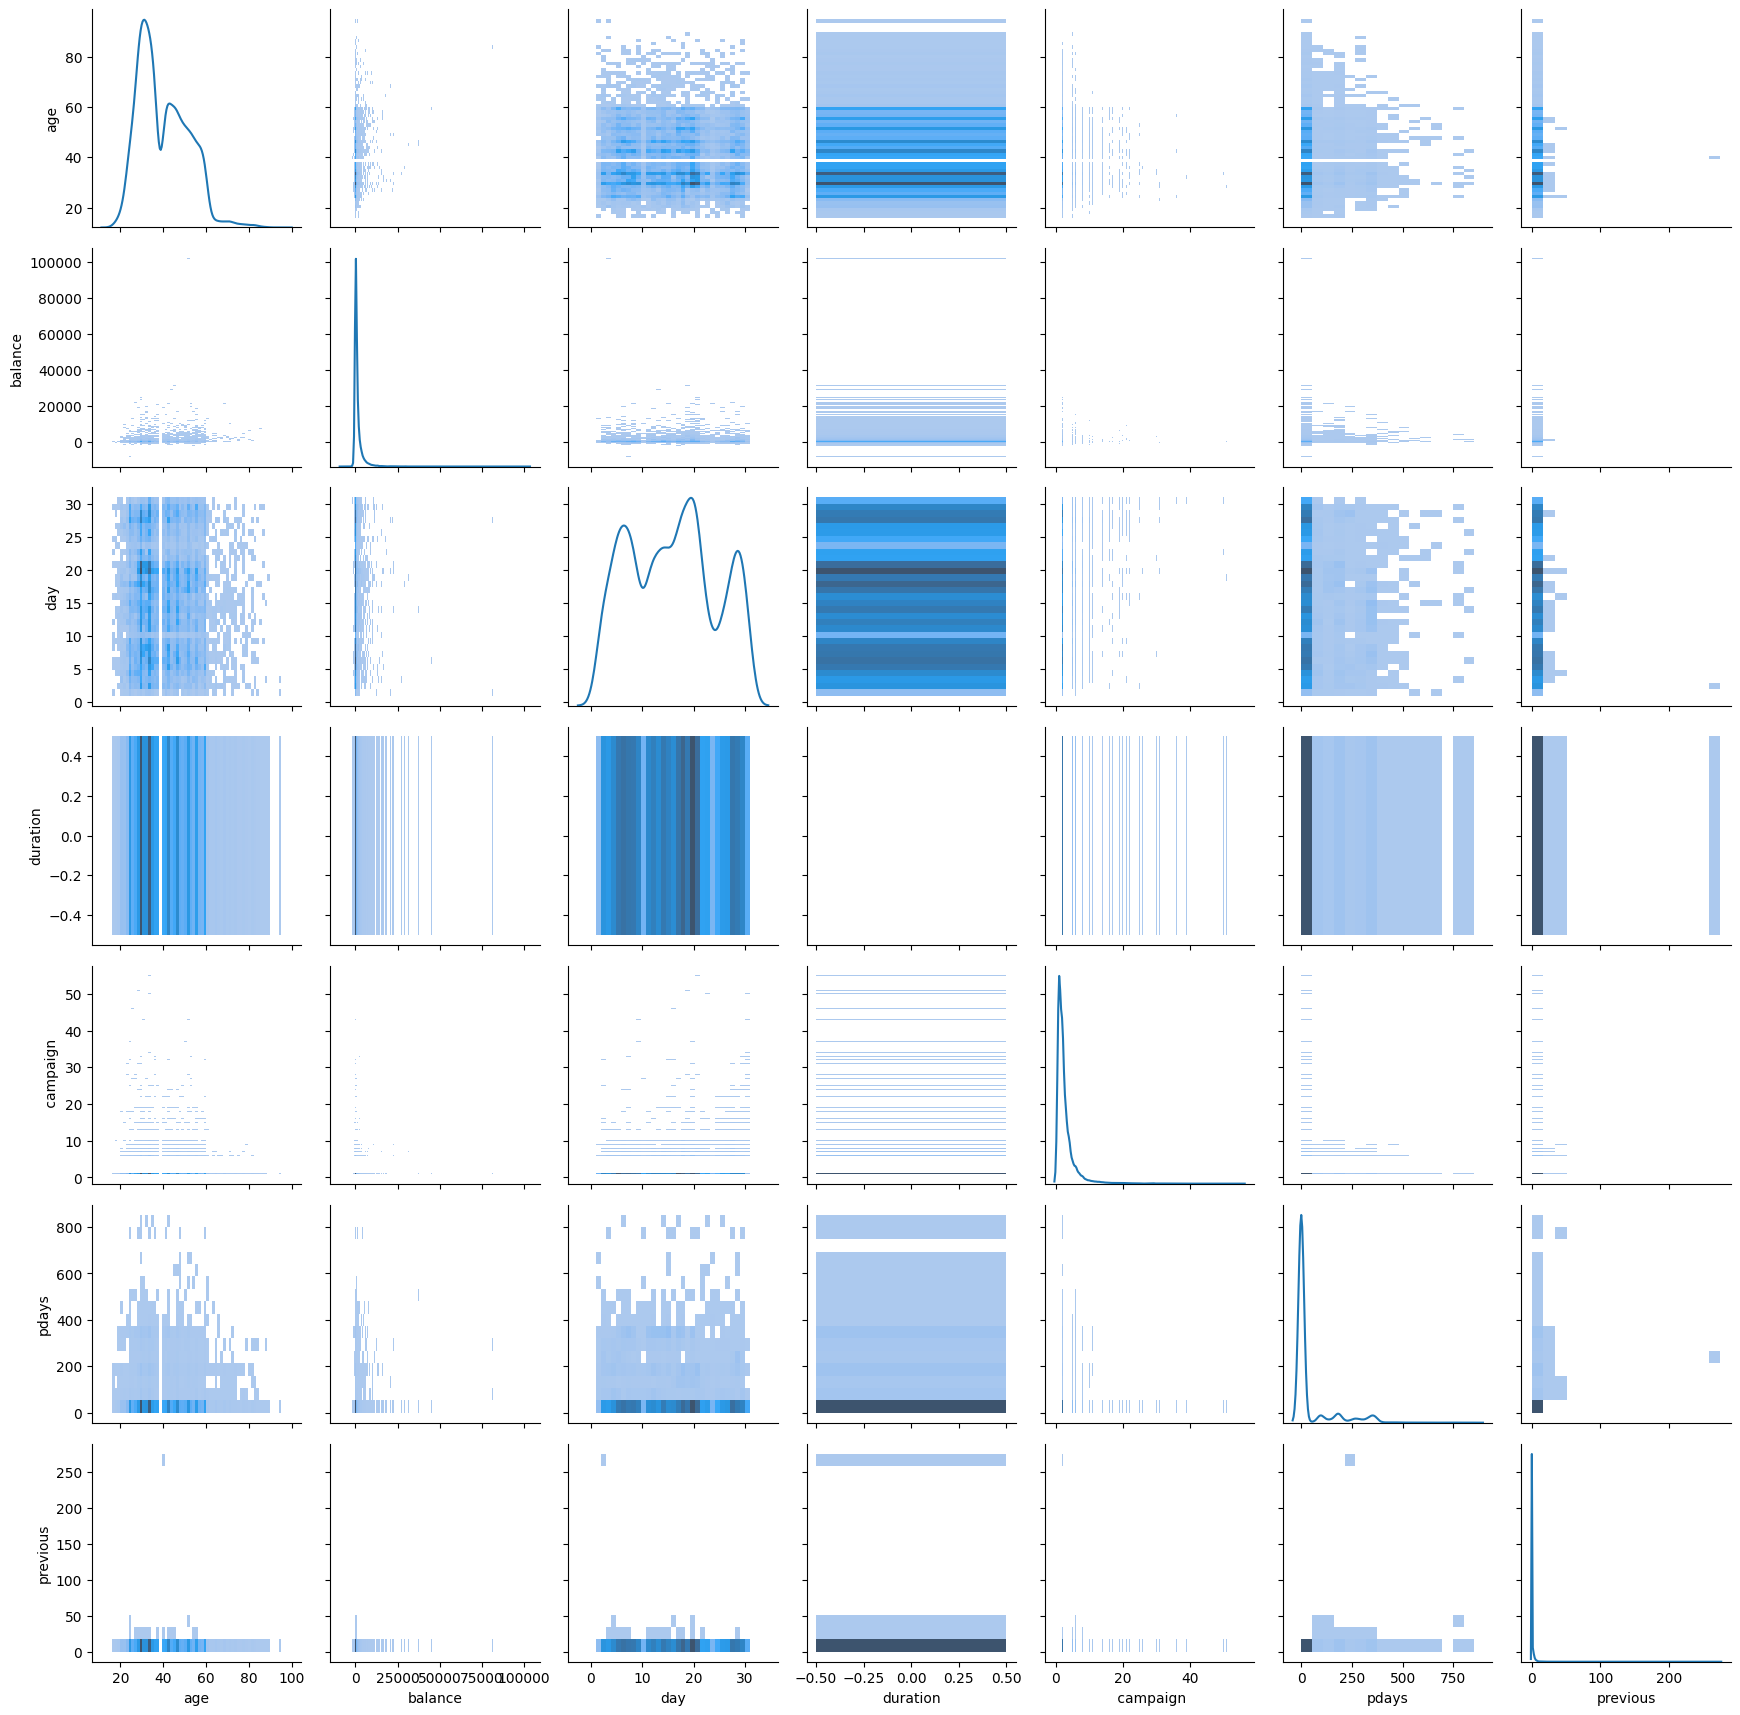

In [11]:
GeneratePairGrid(dfTest)

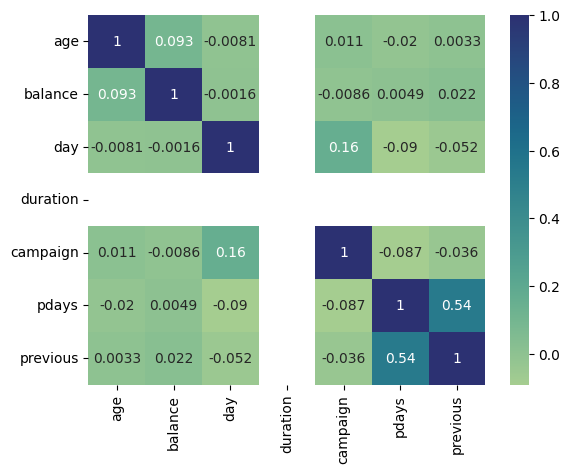

In [12]:
GenerateCorrMap(dfTraining)

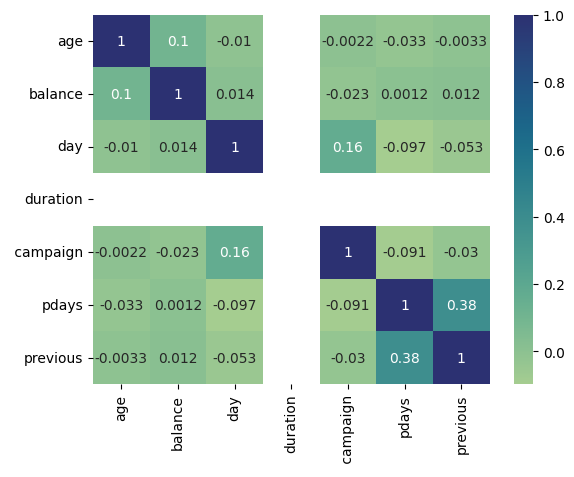

In [13]:
GenerateCorrMap(dfTest)

## Plot number of occurencies of each target result

C:\Users\d4nie\AppData\Local\Temp\ipykernel_13872\3186451447.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count = pd.value_counts(dfTraining["y"], sort=True)


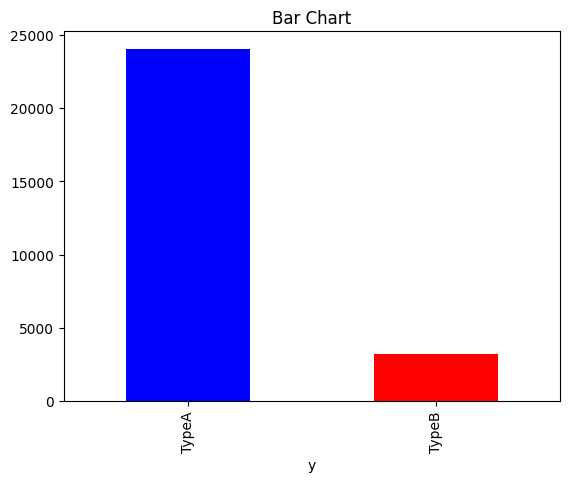

In [14]:
count = pd.value_counts(dfTraining["y"], sort=True)
count.plot(kind='bar', color=['blue', 'red'])
plt.title('Bar Chart')
plt.show()

In [15]:
count

y
TypeA    24030
TypeB     3242
Name: count, dtype: int64

## Getting descriptive features columns

In [16]:
cat_colums = []
index = [1,2,3,4,6,7,8,10,15]
for idx, col in enumerate(dfTraining.columns.values.tolist()):
    if idx in index:
        cat_colums.append(col)
        
cat_colums

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

## Create method to encode any given data set, depending on its status

In [17]:
def encodeDataFrame(df, isTest):
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(df[cat_colums])
    transformed_data = enc.transform(df[cat_colums]).toarray()
    transformed_df = pd.DataFrame(transformed_data, columns=enc.get_feature_names_out(cat_colums))
    #if is the test set
    #No need to concatenate the 'y' column
    if isTest:
        return transformed_df
    else:
        return pd.concat([transformed_df, df['y']], axis=1)

## Encode training set using OneHotEncoder

In [18]:
dfTraining = encodeDataFrame(dfTraining, False)
dfTraining

,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,TypeB
27268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeB
27269,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,TypeB
27270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,TypeA


## Encode query set using OneHotEncoder

In [19]:
dfTest = encodeDataFrame(dfTest, True)
dfTest

,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17934,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Defning features and targets

### Using all columns except the target column y as features

In [20]:
feature = dfTraining.iloc[:,:-1]
target = dfTraining.iloc[:,-1:]


target = target['y'].map({'TypeA': 1, 'TypeB': 0})
feature




,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
27268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
27269,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Spliting the training set 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=14)
print(np.shape(X_train), np.shape(X_test))

X_train


(21817, 44) (5455, 44)


,job_JobCat1,job_JobCat10,job_JobCat11,job_JobCat2,job_JobCat3,job_JobCat4,job_JobCat5,job_JobCat6,job_JobCat7,job_JobCat8,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
18429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22367,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18972,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22855,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13656,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Scalliing the features on the Training set

In [22]:
MxScaler = MinMaxScaler()

X_train = MxScaler.fit_transform(X_train)
X_test = MxScaler.fit_transform(X_test)

X_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Defining best index object that will hold all test precisions values from the 3 different classifier to determine which model to use

In [23]:
best_index_dict = {}

### Create method to Train a specific model, run prediction over a specifiec number of iterations using different values for its parameter, calculate the best score and insert reasult into object created previously

In [24]:
def GetModelScore(NCounts, classifierName):
    List = np.arange(1, NCounts, 1)
    score_train = np.zeros(len(List))
    score_test = np.zeros(len(List))
    recall_test = np.zeros(len(List))
    precision_test = np.zeros(len(List))
    count = 0
    for n in List:
        
        match classifierName:
            case 'KNN':
                model = KNeighborsClassifier(n_neighbors=n)
                param = 'n_neighbors'

            case 'Naive Bayes':
                model = naive_bayes.MultinomialNB(alpha=n)
                param = 'alpha'

            case 'Decision Tree':
                model = DecisionTreeClassifier(max_depth=n, random_state=42)
                param = 'max_depth'
                                
        model.fit(X_train, y_train)
        score_train[count] = model.score(X_train, y_train)
        score_test[count]= model.score(X_test, y_test)
        recall_test[count] = metrics.recall_score(y_test, model.predict(X_test), pos_label=1)
        precision_test[count] = metrics.precision_score(y_test, model.predict(X_test), pos_label=1)
        count = count + 1 
    matrix = np.matrix(np.c_[List, score_train, score_test, recall_test, precision_test])
    models = pd.DataFrame(data = matrix, columns = 
                [param, 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])

    best_index = models['Test Precision'].idxmax()
    OptimunN = models.iloc[best_index, :]

    OptimunN['Test Precision']


    best_index_dict[classifierName] = OptimunN['Test Precision']
    
    return OptimunN

### Run tests on training set for each of the current classifiers:

### KNN 

### Naive Bayes MultonomialNB

### Decision Tree

#### This next code block will take up to 3m depending on processing power

In [25]:
# Running 40 iterations for each of the models
Knn_Max_Score = GetModelScore(40, 'KNN')
Naive_Bayes_Max_Score = GetModelScore(40, 'Naive Bayes')
Decistion_Tree_Max_Score = GetModelScore(40, 'Decision Tree')

### Display object containing best metrics (Test precision) for each model

In [26]:
best_index_dict

{'KNN': 0.9158438061041293,
 'Naive Bayes': 0.9111372088471326,
 'Decision Tree': 0.911776367961935}

### Determines best model out of the three

In [27]:
best_model = max(best_index_dict, key=best_index_dict.get)

best_model

'KNN'

### Define method to write results of prediction to file

In [28]:
def WriteResultsToFile(pred):
    with open('D21125648.txt', 'w') as f:
        for idx, p in enumerate(pred):
            type = 'TypeA' if p == 1 else 'TypeB'
            f.write(f"{idx},{type}\n")
    f.close()

### Define method to run prediction with best model using the best parameter

In [29]:
def GenerateResultWithBestParams(modelName):
    try:        
        match modelName:
            case 'KNN':
                model = KNeighborsClassifier(n_neighbors=math.floor(Knn_Max_Score['n_neighbors']))
                paramName = 'n_neighbors'
                paramValue = Knn_Max_Score
            case 'Naive Bayes':
                model = naive_bayes.MultinomialNB(alpha=math.floor(Naive_Bayes_Max_Score['alpha']))
                paramName = 'alpha'
                paramValue = Naive_Bayes_Max_Score

            case 'Decision Tree':
                model = DecisionTreeClassifier(max_depth=math.floor(Decistion_Tree_Max_Score['max_depth']), random_state=42)
                paramName = 'max_depth'
                paramValue = Decistion_Tree_Max_Score
        model.fit(X_train, y_train)
        pred = model.predict(dfTest)
        WriteResultsToFile(pred)
        print(f"File generate successfully.\n Model: {modelName}\n with {paramName} = {math.floor(paramValue[paramName])}")
    except:
        print("Error generating result file. Try again.")


### Run prediction using the best model and best parameter 

In [30]:
GenerateResultWithBestParams(best_model)

c:\Users\d4nie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


File generate successfully.
 Model: KNN
 with n_neighbors = 2
